# **1. Perkenalan Dataset**


### Nama Dataset

Dataset Pendidikan SD Indonesia Tahun 2023–2024
– sumbernya adalah file CSV yang menjadi dasar analisis dalam notebook tersebut.
Kaggle
+1

###Isi dan Struktur Dataset

Dataset ini berisi data pendidikan jenjang Sekolah Dasar (SD) di seluruh Indonesia, dengan indikator-indikator yang menggambarkan kondisi sekolah, jumlah murid, tenaga pendidik, dan performa siswa.
Kaggle

Kolom / Fitur Utama yang Tercakup:

Provinsi – wilayah administratif tempat sekolah berada.
Kaggle

Sekolah – jumlah sekolah SD dalam provinsi.
Kaggle

Siswa – jumlah peserta didik.
Kaggle

Mengulang – jumlah siswa yang mengulang kelas.
Kaggle

Putus Sekolah – jumlah siswa yang putus sekolah.
Kaggle

Kepala Sekolah dan Guru (≥ S1) – jumlah tenaga pendidik yang memiliki pendidikan minimal S1.
Kaggle

Kepala Sekolah dan Guru (< S1) – jumlah tenaga pendidik yang belum S1.
Kaggle

Tenaga Kependidikan (SM) – staff non-guru berpendidikan Sekolah Menengah.
Kaggle

###Tautan Dataset
https://www.kaggle.com/code/puanbeningpastika/analisis-kelayakan-sekolah-dasar-di-indonesia/input

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install kaggle pandas

In [2]:
!pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 8.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import os
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from google.colab import files

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Mengunduh dataset dari kaggle
dataset_path = kagglehub.dataset_download('puanbeningpastika/dataset-pendidikan-sd-indonesia-2023-2024')
print("Dataset berhasil diunduh di folder:", dataset_path)

100%|██████████| 2.11k/2.11k [00:00<00:00, 5.33MB/s]

Extracting files...
Dataset berhasil diunduh di folder: /root/.cache/kagglehub/datasets/puanbeningpastika/dataset-pendidikan-sd-indonesia-2023-2024/versions/1


In [5]:
files = os.listdir(dataset_path)
file_path = os.path.join(dataset_path, files[0])

In [6]:
df = pd.read_csv(file_path)
# Drop the 'Unnamed: 14' column as it appears to contain only NaN values
if 'Unnamed: 14' in df.columns:
    df = df.drop(columns=['Unnamed: 14'])

In [7]:
csv_output_path = 'Data-Sekolah.csv'
df.to_csv(csv_output_path, index=False)
print("CSV berhasil disimpan di:", csv_output_path)

CSV berhasil disimpan di: Data-Sekolah.csv


In [8]:
df.head()

,Provinsi,Sekolah,Siswa,Mengulang,Putus Sekolah,Kepala Sekolah dan Guru(<S1),Kepala Sekolah dan Guru(≥ S1),Tenaga Kependidikan(SM),Tenaga Kependidikan(>SM),Rombongan Belajar,Ruang kelas(baik),Ruang kelas(rusak ringan),Ruang kelas(rusak sedang),Ruang kelas(rusak berat)
0,Prov. D.K.I. Jakarta,2224,756455,1202,869,1089,38305,6967,1569,27830,23320,3886,717,345
1,Prov. Jawa Barat,19553,4487262,4778,5675,5007,209252,27487,3353,169704,59592,46006,34432,14397
2,Prov. Jawa Tengah,18618,2595050,6909,2399,2337,167535,21325,2473,127266,51050,42356,26321,13457
3,Prov. D.I. Yogyakarta,1846,270610,357,75,326,19771,4536,866,13719,8217,3878,1827,548
4,Prov. Jawa Timur,18980,2530849,4694,3327,2950,180465,21116,3818,134724,58679,42896,24218,14389


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

/tmp/ipython-input-1775609840.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


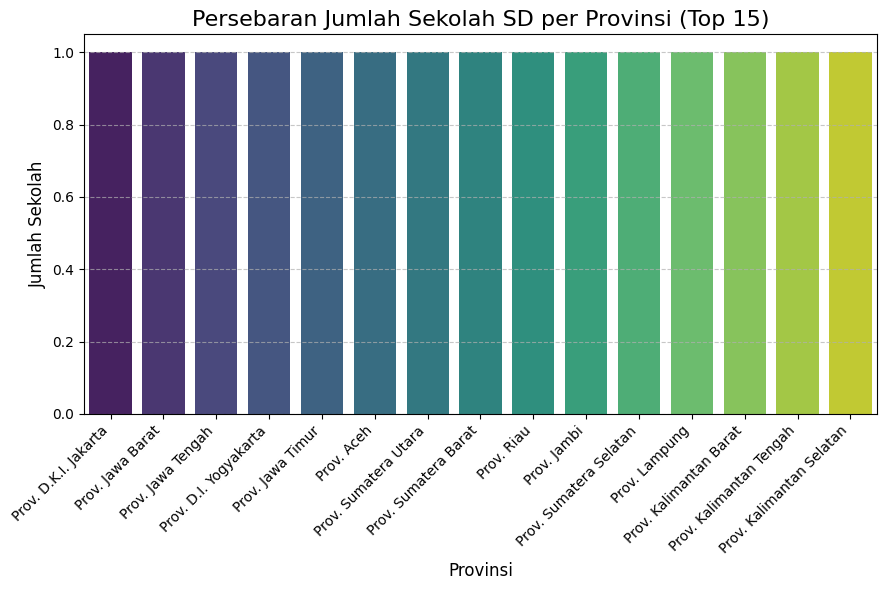

In [9]:
#Persebaran Provinsi
# --------------------------------------------------------

# 1. HITUNG JUMLAH SEKOLAH PER PROVINSI
# Menghitung frekuensi kemunculan setiap provinsi
distribusi_provinsi = df['Provinsi'].value_counts()

# 2. VISUALISASI HASIL PERSEBARAN (BAR CHART)

# Siapkan data untuk plot
# Kita akan menggunakan 15 provinsi terbanyak agar plot tidak terlalu padat
top_n = 15
data_to_plot = distribusi_provinsi.head(top_n)

# Konfigurasi ukuran plot
plt.figure(figsize=(9, 6))

# Membuat Bar Plot menggunakan Seaborn
sns.barplot(
    x=data_to_plot.index,   # Nama-nama Provinsi
    y=data_to_plot.values,  # Jumlah Sekolah
    palette='viridis'       # Pilihan warna
)

# Menambahkan judul dan label
plt.title(f'Persebaran Jumlah Sekolah SD per Provinsi (Top {top_n})', fontsize=16)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Sekolah', fontsize=12)

# Rotasi label x agar nama provinsi tidak bertumpuk
plt.xticks(rotation=45, ha='right')

# Menambahkan grid untuk keterbacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mengatur layout agar teks tidak terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

/tmp/ipython-input-2396104956.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


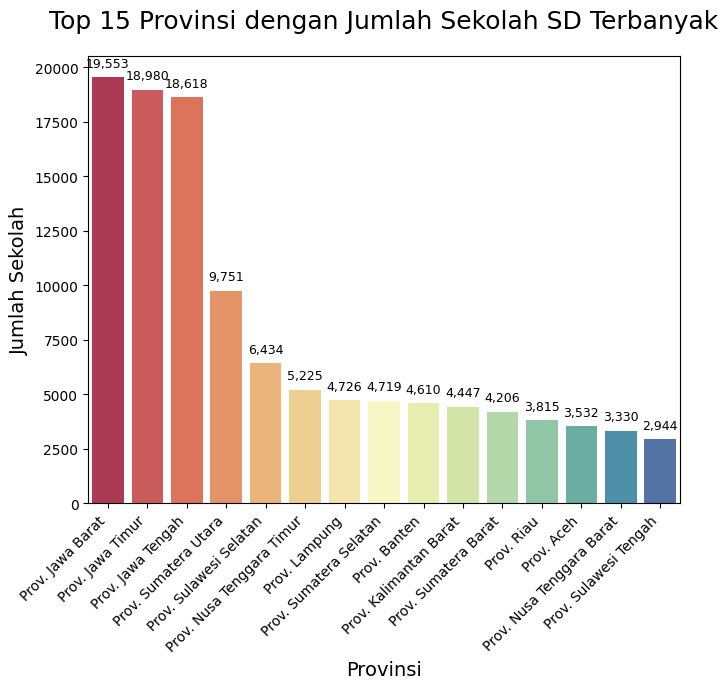

/tmp/ipython-input-2396104956.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


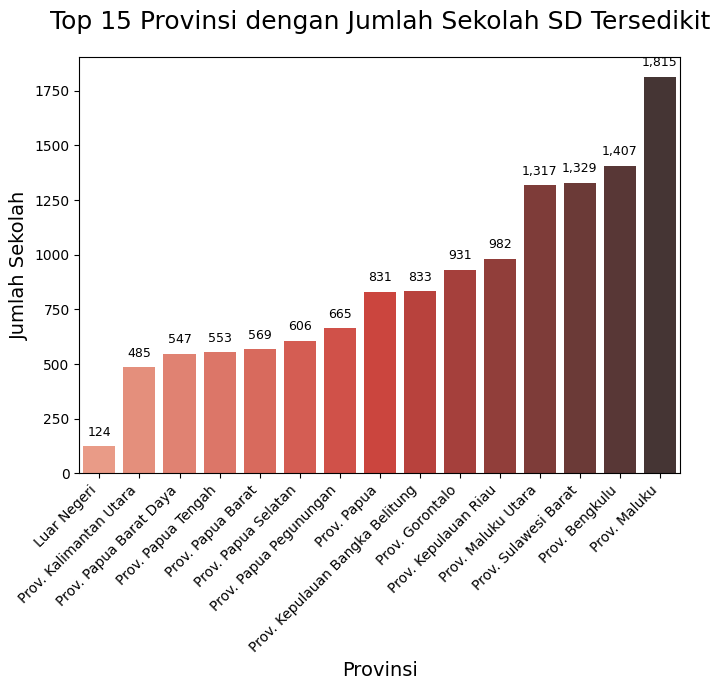

In [10]:
# --------------------------------------------------------
# 2. MENGHITUNG DAN MENAMPILKAN JUMLAH SEKOLAH PER PROVINSI
# --------------------------------------------------------

# Kita menggunakan kolom 'Sekolah' (kolom kedua dari dataset Anda)
# yang sudah berisi total jumlah sekolah per baris provinsi.

# Cukup tampilkan kolom yang relevan: Provinsi dan Sekolah
df_distribusi = df[['Provinsi', 'Sekolah']].sort_values(by='Sekolah', ascending=False).reset_index(drop=True)

# --------------------------------------------------------
# 3. VISUALISASI PERSEBARAN
# --------------------------------------------------------

# Gunakan data distribusi yang sudah diurutkan untuk visualisasi
data_to_plot = df_distribusi.head(15) # Ambil 15 provinsi teratas

plt.figure(figsize=(7, 7))

# Membuat Bar Plot
ax = sns.barplot(
    x=data_to_plot['Provinsi'],
    y=data_to_plot['Sekolah'],
    palette='Spectral'
)

# Menambahkan judul, label, dan memutar label x
plt.title(f'Top 15 Provinsi dengan Jumlah Sekolah SD Terbanyak', fontsize=18, pad=20)
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah Sekolah', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan nilai (label) di atas setiap bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=9
    )

plt.tight_layout()
plt.show()

# --------------------------------------------------------
# 2. MENGHITUNG DAN MENAMPILKAN JUMLAH SEKOLAH PER PROVINSI (TERSEDIKIT)
# --------------------------------------------------------

# Mengurutkan berdasarkan kolom 'Sekolah' secara ASCENDING (dari kecil ke besar)
# menggunakan 'ascending=True'
df_distribusi_terkecil = df[['Provinsi', 'Sekolah']].sort_values(
    by='Sekolah',
    ascending=True  # Perubahan di sini!
).reset_index(drop=True)

# --------------------------------------------------------
# 3. VISUALISASI PERSEBARAN 15 PROVINSI TERSEDIKIT
# --------------------------------------------------------

# Gunakan data distribusi yang sudah diurutkan secara ascending
data_to_plot_terkecil = df_distribusi_terkecil.head(15) # Ambil 15 provinsi teratas (terkecil)

plt.figure(figsize=(7, 7))

# Membuat Bar Plot
ax = sns.barplot(
    x=data_to_plot_terkecil['Provinsi'],   # Nama-nama Provinsi
    y=data_to_plot_terkecil['Sekolah'],  # Jumlah Sekolah
    palette='Reds_d'                     # Menggunakan skema warna yang berbeda untuk membedakan
)

# Menambahkan judul, label, dan memutar label x
plt.title(f'Top 15 Provinsi dengan Jumlah Sekolah SD Tersedikit', fontsize=18, pad=20)
plt.xlabel('Provinsi', fontsize=14)
plt.ylabel('Jumlah Sekolah', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan nilai (label) di atas setiap bar
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=9
    )

plt.tight_layout()
plt.show()

/tmp/ipython-input-3091142239.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_max = sns.barplot(


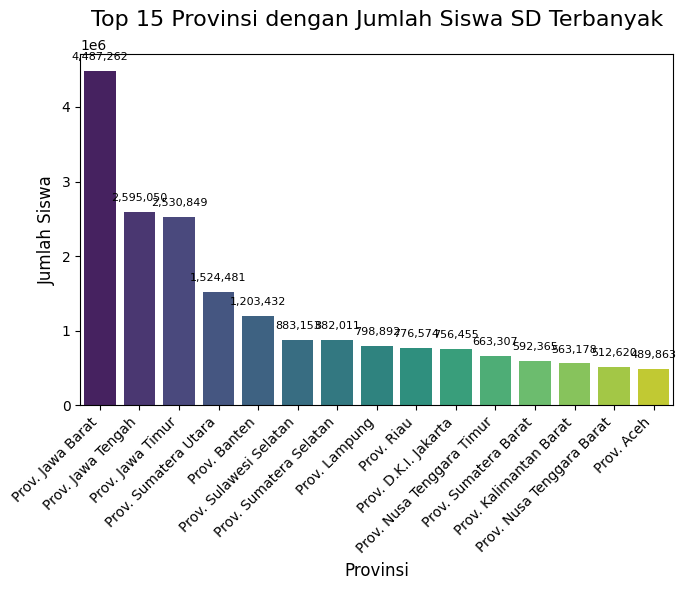

/tmp/ipython-input-3091142239.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_min = sns.barplot(


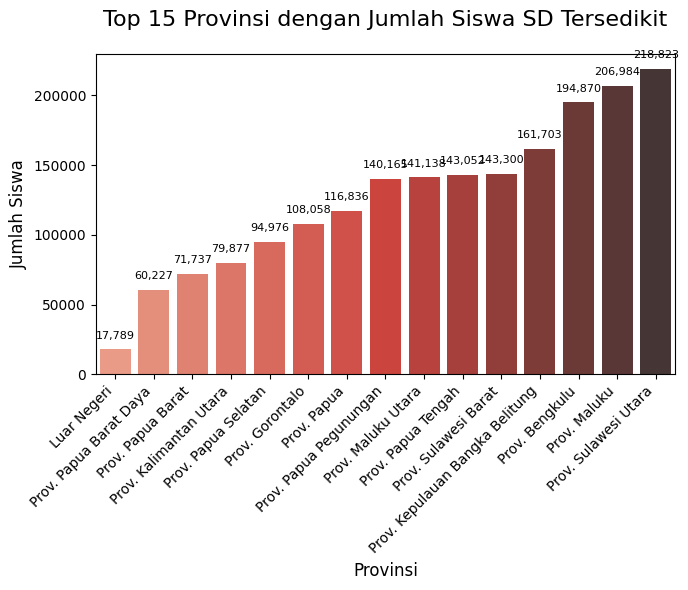

In [11]:
# ========================================================
# BAGIAN A: SISWA TERBANYAK
# ========================================================

# 1. MENGHITUNG DAN MENAMPILKAN SISWA TERBANYAK
# Mengurutkan berdasarkan kolom 'Siswa' secara DESCENDING (dari besar ke kecil)
df_siswa_terbanyak = df[['Provinsi', 'Siswa']].sort_values(
    by='Siswa',
    ascending=False
).reset_index(drop=True)


# 2. VISUALISASI SISWA TERBANYAK
data_to_plot_max = df_siswa_terbanyak.head(15)

plt.figure(figsize=(7, 6))
ax_max = sns.barplot(
    x=data_to_plot_max['Provinsi'],
    y=data_to_plot_max['Siswa'],
    palette='viridis'
)

# Menambahkan judul, label, dan memutar label x
plt.title('Top 15 Provinsi dengan Jumlah Siswa SD Terbanyak', fontsize=16, pad=20)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Siswa', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan nilai di atas bar
for p in ax_max.patches:
    ax_max.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8
    )

plt.tight_layout()
plt.show() #

# ========================================================
# BAGIAN B: SISWA TERSEDIKIT
# ========================================================

# 1. MENGHITUNG DAN MENAMPILKAN SISWA TERSEDIKIT
# Mengurutkan berdasarkan kolom 'Siswa' secara ASCENDING (dari kecil ke besar)
df_siswa_tersedikit = df[['Provinsi', 'Siswa']].sort_values(
    by='Siswa',
    ascending=True # Perubahan di sini!
).reset_index(drop=True)

# 2. VISUALISASI SISWA TERSEDIKIT
data_to_plot_min = df_siswa_tersedikit.head(15)

plt.figure(figsize=(7, 6))
ax_min = sns.barplot(
    x=data_to_plot_min['Provinsi'],
    y=data_to_plot_min['Siswa'],
    palette='Reds_d'
)

# Menambahkan judul, label, dan memutar label x
plt.title('Top 15 Provinsi dengan Jumlah Siswa SD Tersedikit', fontsize=16, pad=20)
plt.xlabel('Provinsi', fontsize=12)
plt.ylabel('Jumlah Siswa', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Menambahkan nilai di atas bar
for p in ax_min.patches:
    ax_min.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8
    )

plt.tight_layout()
plt.show() #

/tmp/ipython-input-992187451.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


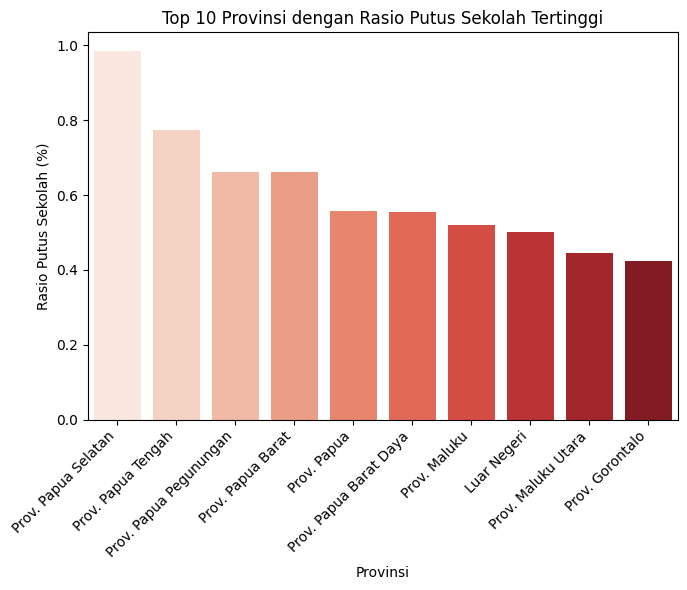

In [12]:
# Hitung rasio Putus Sekolah terhadap Siswa Total
df['Rasio_Putus_Sekolah'] = (df['Putus Sekolah'] / df['Siswa']) * 100

# Urutkan dan tampilkan 10 provinsi dengan Rasio Putus Sekolah tertinggi
df_putus_sekolah = df[[
    'Provinsi',
    'Rasio_Putus_Sekolah'
]].sort_values(by='Rasio_Putus_Sekolah', ascending=False).head(10)

# Visualisasi Rasio Putus Sekolah Tertinggi
plt.figure(figsize=(7, 6))
sns.barplot(
    x='Provinsi',
    y='Rasio_Putus_Sekolah',
    data=df_putus_sekolah,
    palette='Reds'
)
plt.title('Top 10 Provinsi dengan Rasio Putus Sekolah Tertinggi')
plt.ylabel('Rasio Putus Sekolah (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Asumsikan DataFrame 'df' sudah dimuat

# 1. Rasio Siswa per Sekolah (Rata-rata kepadatan sekolah)
df['Siswa_per_Sekolah'] = df['Siswa'] / df['Sekolah']

# 2. Rasio Siswa per Guru (Student-Teacher Ratio)
# Asumsi: Guru = Kepala Sekolah dan Guru (<S1) + Kepala Sekolah dan Guru (>S1) + Tenaga Kependidikan (>S1)
# Namun, untuk akurasi, kita hanya menggunakan kolom yang jelas mengindikasikan pengajar jika ada.
# Karena dataset Anda hanya memiliki 'Kepala Sekolah dan Guru (<S1)' dan 'Kepala Sekolah dan Guru (>S1)',
# kita akan menjumlahkan keduanya sebagai total tenaga pengajar formal (Guru).
df['Total_Guru'] = df['Kepala Sekolah dan Guru(<S1)'] + df['Kepala Sekolah dan Guru(≥ S1)']
df['Rasio_Siswa_Guru'] = df['Siswa'] / df['Total_Guru']

# 3. Persentase Ruang Kelas Rusak Berat (Indikator Kualitas Infrastruktur)
df['Persen_Rusak_Berat'] = (df['Ruang kelas(rusak berat)'] / (df['Ruang kelas(baik)'] + df['Ruang kelas(rusak ringan)'] + df['Ruang kelas(rusak sedang)'] + df['Ruang kelas(rusak berat)'])) * 100

print("DataFrame dengan Rasio Kritis:")
print(df[['Provinsi', 'Siswa_per_Sekolah', 'Rasio_Siswa_Guru', 'Persen_Rusak_Berat']].head())

DataFrame dengan Rasio Kritis:
                Provinsi  Siswa_per_Sekolah  Rasio_Siswa_Guru  \
0   Prov. D.K.I. Jakarta         340.132644         19.202290   
1       Prov. Jawa Barat         229.492252         20.943167   
2      Prov. Jawa Tengah         139.383930         15.276502   
3  Prov. D.I. Yogyakarta         146.592633         13.465194   
4       Prov. Jawa Timur         133.342940         13.798484   

   Persen_Rusak_Berat  
0            1.220461  
1            9.322852  
2           10.104067  
3            3.787146  
4           10.264513  


/tmp/ipython-input-1094829124.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


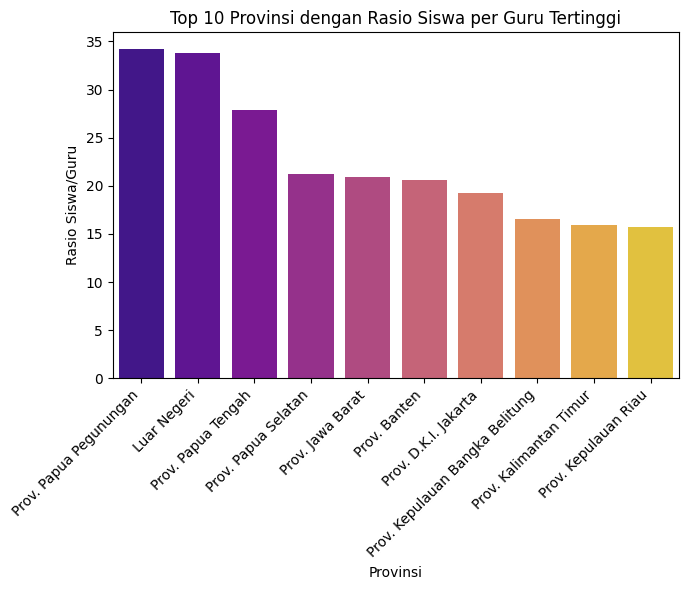

In [14]:
# Hitung total guru
df['Total_Guru'] = df['Kepala Sekolah dan Guru(<S1)'] + df['Kepala Sekolah dan Guru(≥ S1)']

# Hitung Rasio Siswa-Guru
df['Rasio_Siswa_Guru'] = df['Siswa'] / df['Total_Guru']

# Urutkan dan tampilkan 10 provinsi dengan Rasio Siswa-Guru tertinggi (terburuk)
df_rasio_guru_tertinggi = df[[
    'Provinsi',
    'Rasio_Siswa_Guru'
]].sort_values(by='Rasio_Siswa_Guru', ascending=False).head(10)


# Visualisasi Rasio Siswa-Guru Tertinggi
plt.figure(figsize=(7, 6))
sns.barplot(
    x='Provinsi',
    y='Rasio_Siswa_Guru',
    data=df_rasio_guru_tertinggi,
    palette='plasma'
)
plt.title('Top 10 Provinsi dengan Rasio Siswa per Guru Tertinggi')
plt.ylabel('Rasio Siswa/Guru')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1213559277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


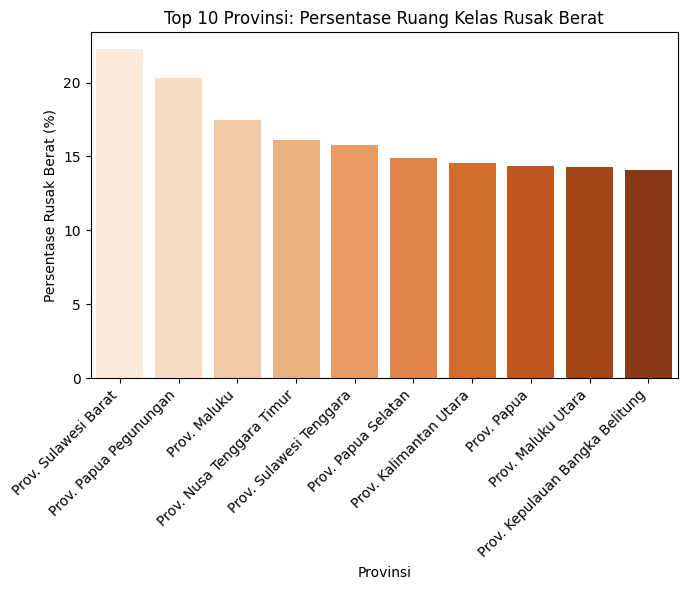

In [15]:
# Urutkan dan tampilkan 10 provinsi dengan Persentase Ruang Kelas Rusak Berat tertinggi
df_rusak_berat = df[[
    'Provinsi',
    'Persen_Rusak_Berat'
]].sort_values(by='Persen_Rusak_Berat', ascending=False).head(10)

# Visualisasi Persen Rusak Berat Tertinggi
plt.figure(figsize=(7, 6))
sns.barplot(
    x='Provinsi',
    y='Persen_Rusak_Berat',
    data=df_rusak_berat,
    palette='Oranges'
)
plt.title('Top 10 Provinsi: Persentase Ruang Kelas Rusak Berat')
plt.ylabel('Persentase Rusak Berat (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Koefisien Korelasi (Pearson) antara Rasio_Siswa_Guru dan Persen_Rusak_Berat: -0.22


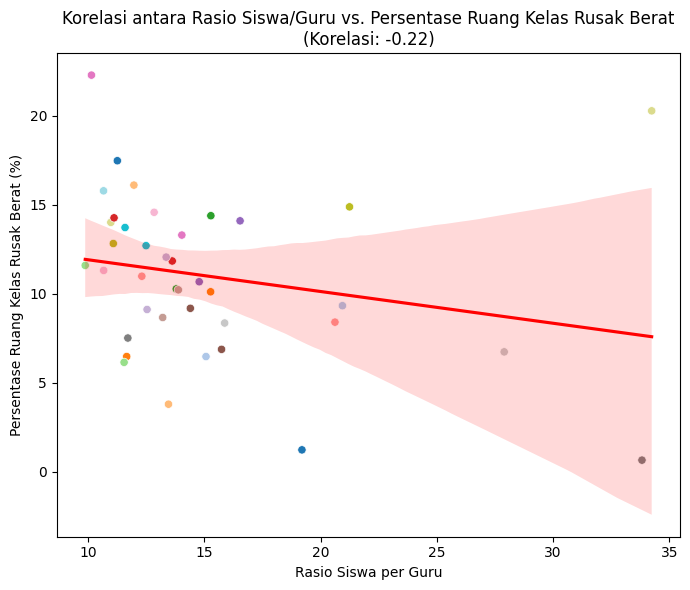

In [16]:
# Korelasi antara Rasio Siswa/Guru dan Persentase Ruang Kelas Rusak Berat
# Apakah provinsi yang gurunya sedikit juga memiliki fasilitas yang buruk?

# Tentukan dua variabel
x_var = 'Rasio_Siswa_Guru'
y_var = 'Persen_Rusak_Berat'

# Hitung koefisien korelasi Pearson
correlation = df[x_var].corr(df[y_var])
print(f"\nKoefisien Korelasi (Pearson) antara {x_var} dan {y_var}: {correlation:.2f}")

# Scatter Plot
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x=x_var,
    y=y_var,
    data=df,
    hue='Provinsi', # Gunakan warna berbeda untuk setiap provinsi
    palette='tab20',
    legend=False # Sembunyikan legenda provinsi agar tidak terlalu ramai
)

# Tambahkan garis regresi (opsional, untuk melihat tren)
sns.regplot(
    x=x_var,
    y=y_var,
    data=df,
    scatter=False,
    color='red'
)

plt.title(f'Korelasi antara Rasio Siswa/Guru vs. Persentase Ruang Kelas Rusak Berat\n(Korelasi: {correlation:.2f})')
plt.xlabel('Rasio Siswa per Guru')
plt.ylabel('Persentase Ruang Kelas Rusak Berat (%)')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [17]:
df.info

<bound method DataFrame.info of                            Provinsi  Sekolah    Siswa  Mengulang  \
0              Prov. D.K.I. Jakarta     2224   756455       1202   
1                  Prov. Jawa Barat    19553  4487262       4778   
2                 Prov. Jawa Tengah    18618  2595050       6909   
3             Prov. D.I. Yogyakarta     1846   270610        357   
4                  Prov. Jawa Timur    18980  2530849       4694   
5                        Prov. Aceh     3532   489863       1406   
6              Prov. Sumatera Utara     9751  1524481       4896   
7              Prov. Sumatera Barat     4206   592365       4643   
8                        Prov. Riau     3815   776574       4446   
9                       Prov. Jambi     2464   368620       2006   
10           Prov. Sumatera Selatan     4719   882011       6469   
11                    Prov. Lampung     4726   798892       2412   
12           Prov. Kalimantan Barat     4447   563178       9801   
13          Prov. Kalimantan Tengah     2650   276421       2806   
14         Prov. Kalimantan Selatan     2920   353174       3201   
15           Prov. Kalimantan Timur     1929   419472       2063   
16             Prov. Sulawesi Utara     2209   218823        728   
17            Prov. Sulawesi Tengah     2944   312352       3004   
18           Prov. Sulawesi Selatan     6434   883153       3300   
19          Prov. Sulawesi Tenggara     2347   294170       1643   
20                     Prov. Maluku     1815   206984       1933   
21                       Prov. Bali     2409   383616        183   
22        Prov. Nusa Tenggara Barat     3330   512620       1501   
23        Prov. Nusa Tenggara Timur     5225   663307       8887   
24                      Prov. Papua      831   116836       1605   
25                   Prov. Bengkulu     1407   194870       1313   
26               Prov. Maluku Utara     1317   141138       1126   
27                     Prov. Banten     4610  1203432       2551   
28  Prov. Kepulauan Bangka Belitung      833   161703       1202   
29                  Prov. Gorontalo      931   108058       1446   
30             Prov. Kepulauan Riau      982   227249        651   
31                Prov. Papua Barat      569    71737       2049   
32             Prov. Sulawesi Barat     1329   143300       1092   
33           Prov. Kalimantan Utara      485    79877        364   
34                      Luar Negeri      124    17789         56   
35               Prov. Papua Tengah      553   143052       3741   
36              Prov. Papua Selatan      606    94976       5003   
37           Prov. Papua Pegunungan      665   140165       3978   
38           Prov. Papua Barat Daya      547    60227       1347   

    Putus Sekolah  Kepala Sekolah dan Guru(<S1)  \
0             869                          1089   
1            5675                          5007   
2            2399                          2337   
3              75                           326   
4            3327                          2950   
5             905                          2062   
6            4390                          3279   
7             858                          1022   
8            1388                          2214   
9             835                          1177   
10           1976                          2171   
11            833                          2096   
12           1324                          1751   
13            675                           855   
14            532                           788   
15            669                           679   
16            435                           859   
17           1033                          1974   
18           1613                          1617   
19            784                           992   
20           1076                          2020   
21            179                           346   
22           1235                          1273   
23           2771      

In [18]:
df.describe

<bound method NDFrame.describe of                            Provinsi  Sekolah    Siswa  Mengulang  \
0              Prov. D.K.I. Jakarta     2224   756455       1202   
1                  Prov. Jawa Barat    19553  4487262       4778   
2                 Prov. Jawa Tengah    18618  2595050       6909   
3             Prov. D.I. Yogyakarta     1846   270610        357   
4                  Prov. Jawa Timur    18980  2530849       4694   
5                        Prov. Aceh     3532   489863       1406   
6              Prov. Sumatera Utara     9751  1524481       4896   
7              Prov. Sumatera Barat     4206   592365       4643   
8                        Prov. Riau     3815   776574       4446   
9                       Prov. Jambi     2464   368620       2006   
10           Prov. Sumatera Selatan     4719   882011       6469   
11                    Prov. Lampung     4726   798892       2412   
12           Prov. Kalimantan Barat     4447   563178       9801   
13          Prov. Kalimantan Tengah     2650   276421       2806   
14         Prov. Kalimantan Selatan     2920   353174       3201   
15           Prov. Kalimantan Timur     1929   419472       2063   
16             Prov. Sulawesi Utara     2209   218823        728   
17            Prov. Sulawesi Tengah     2944   312352       3004   
18           Prov. Sulawesi Selatan     6434   883153       3300   
19          Prov. Sulawesi Tenggara     2347   294170       1643   
20                     Prov. Maluku     1815   206984       1933   
21                       Prov. Bali     2409   383616        183   
22        Prov. Nusa Tenggara Barat     3330   512620       1501   
23        Prov. Nusa Tenggara Timur     5225   663307       8887   
24                      Prov. Papua      831   116836       1605   
25                   Prov. Bengkulu     1407   194870       1313   
26               Prov. Maluku Utara     1317   141138       1126   
27                     Prov. Banten     4610  1203432       2551   
28  Prov. Kepulauan Bangka Belitung      833   161703       1202   
29                  Prov. Gorontalo      931   108058       1446   
30             Prov. Kepulauan Riau      982   227249        651   
31                Prov. Papua Barat      569    71737       2049   
32             Prov. Sulawesi Barat     1329   143300       1092   
33           Prov. Kalimantan Utara      485    79877        364   
34                      Luar Negeri      124    17789         56   
35               Prov. Papua Tengah      553   143052       3741   
36              Prov. Papua Selatan      606    94976       5003   
37           Prov. Papua Pegunungan      665   140165       3978   
38           Prov. Papua Barat Daya      547    60227       1347   

    Putus Sekolah  Kepala Sekolah dan Guru(<S1)  \
0             869                          1089   
1            5675                          5007   
2            2399                          2337   
3              75                           326   
4            3327                          2950   
5             905                          2062   
6            4390                          3279   
7             858                          1022   
8            1388                          2214   
9             835                          1177   
10           1976                          2171   
11            833                          2096   
12           1324                          1751   
13            675                           855   
14            532                           788   
15            669                           679   
16            435                           859   
17           1033                          1974   
18           1613                          1617   
19            784                           992   
20           1076                          2020   
21            179                           346   
22           1235                          1273   
23           2771    

In [19]:
df = df.dropna()

In [20]:
df = df.drop_duplicates()

In [21]:
# Define 'cols' with the numerical columns to be scaled.
# It is crucial to ensure that the DataFrame 'df' is not empty before this step.
# The 'Unnamed: 14' column should ideally be dropped earlier if it causes df to become empty.

# Select all numerical columns, excluding 'Provinsi' as it's categorical.
# If 'Unnamed: 14' was not dropped, it might be included here but will be handled if df is empty.
# Assuming 'Provinsi' is of object/string type and other relevant columns are numerical.
numerical_cols_to_scale = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'Provinsi' is not in the list if it accidentally was, or if its type changed.
if 'Siswa' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('Siswa')

cols = numerical_cols_to_scale

# Proceed with scaling only if the DataFrame is not empty and there are columns to scale
if not df.empty and cols:
    scaler = MinMaxScaler()
    df[cols] = scaler.fit_transform(df[cols])
    print("Selected numerical columns have been scaled using MinMaxScaler.")
elif df.empty:
    print("Error: The DataFrame is empty. Please ensure 'Unnamed: 14' is dropped and df.dropna() doesn't remove all rows before this step.")
else:
    print("No numerical columns found to scale.")

Selected numerical columns have been scaled using MinMaxScaler.


In [22]:
winsor = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=1.5,
    # The column 'Pendapatan' does not exist in the dataframe.
    # Please replace with a valid numerical column you wish to cap for outliers.
    # For example, variables=['Siswa'] or variables=['Mengulang']
    # variables=['Pendapatan']
)

# df = winsor.fit_transform(df)

In [23]:
df_encoded = pd.get_dummies(
    df,
    columns=['Provinsi'],
    drop_first=True
)

In [24]:
assert df_encoded.select_dtypes(include="object").empty, \
    "Masih ada kolom string setelah encoding!"

print("✅ Semua kolom sudah numerik")

✅ Semua kolom sudah numerik


In [25]:
from google.colab import files
df_encoded.to_csv('datasekolahsiap.csv', index=False)
files.download('datasekolahsiap.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>